$Atividade (1.25):$ Treine uma MLP no conjunto de dados MNIST e veja se você consegue obter mais de 98% de precisão. Dica: faça a aquisição dos dados usando o Keras (keras.datasets.mnist.load_data()).

## Importando as bibliotecas

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf #back-end
from tensorflow import keras #front-end

## 1. Aquisição de dados

In [226]:
tf.keras.datasets.mnist.load_data(path="mnist.npz")

((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [227]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [228]:
X_train.shape

(60000, 28, 28)

In [229]:
X_test.shape

(10000, 28, 28)

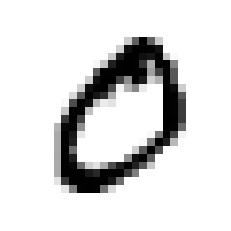

In [230]:
plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()

In [231]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

## 2. Pré-processamento

In [232]:
X_valid, X_train = X_train[:5000] / 255., X_train[5000:] / 255.
y_valid, y_train = y_train[:5000], y_train[5000:] 
X_test = X_test / 255.

## 3. Construindo a arquitetura

In [233]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [234]:
model

In [235]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_7 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 300)               235500    
                                                                 
 dense_22 (Dense)            (None, 100)               30100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [236]:
hidden1 = model.layers[1]

In [237]:
weights, biases = hidden1.get_weights()

In [238]:
weights.shape

(784, 300)

In [239]:
biases.shape

(300,)

In [240]:
hidden2 = model.layers[2]

In [241]:
weights, biases = hidden2.get_weights()

In [242]:
weights.shape

(300, 100)

In [243]:
biases.shape

(100,)

In [244]:
output = model.layers[3]

In [245]:
weights, biases = output.get_weights()

In [246]:
weights.shape

(100, 10)

In [247]:
biases.shape

(10,)

## 4. Treinando a rede

In [248]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])

### 4.1. Parâmetros do treino

In [249]:
history = model.fit(X_train, y_train, epochs=45, validation_data=(X_valid, y_valid))

Epoch 1/45
1719/1719 [==============================] - 5s 2ms/step - loss: 0.6197 - accuracy: 0.8396 - val_loss: 0.3194 - val_accuracy: 0.9124
Epoch 2/45
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2958 - accuracy: 0.9157 - val_loss: 0.2524 - val_accuracy: 0.9282
Epoch 3/45
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2422 - accuracy: 0.9305 - val_loss: 0.2114 - val_accuracy: 0.9416
Epoch 4/45
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2071 - accuracy: 0.9412 - val_loss: 0.1841 - val_accuracy: 0.9516
Epoch 5/45
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1804 - accuracy: 0.9488 - val_loss: 0.1643 - val_accuracy: 0.9548
Epoch 6/45
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1594 - accuracy: 0.9552 - val_loss: 0.1466 - val_accuracy: 0.9592
Epoch 7/45
1719/1719 [==============================] - 4s 2ms/step - loss: 0.1424 - accuracy: 0.9594 - val_loss: 0.1348 - val_accuracy:

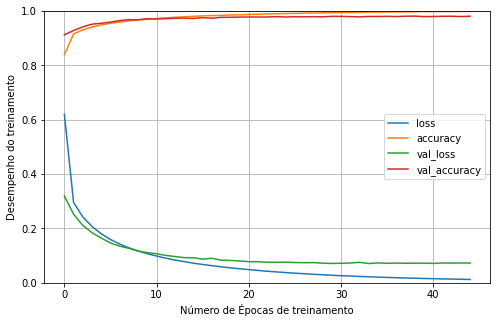

In [250]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Número de Épocas de treinamento")
plt.ylabel("Desempenho do treinamento")
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## 5. Testando o modelo

In [251]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0643 - accuracy: 0.9809


[0.06428640335798264, 0.98089998960495]

In [253]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


In [254]:
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score
print('Acurácia: ', accuracy_score(y_test,y_pred))
print('Kappa: ', cohen_kappa_score(y_test,y_pred))
print('Matriz de confusão: \n', confusion_matrix(y_test,y_pred))

Acurácia:  0.9809
Kappa:  0.9787690148065891
Matriz de confusão: 
 [[ 967    0    2    0    2    2    1    1    4    1]
 [   0 1128    2    1    0    1    2    0    1    0]
 [   4    2 1013    4    1    0    1    3    4    0]
 [   0    1    7  987    0    2    0    3    4    6]
 [   1    0    6    0  967    0    2    2    0    4]
 [   2    0    0    9    3  866    4    1    5    2]
 [   3    3    1    1    4    3  943    0    0    0]
 [   1    3    8    2    0    0    0 1006    2    6]
 [   4    0    3    5    4    2    3    2  948    3]
 [   3    2    0    6    8    3    0    3    0  984]]


## 6. Salvando o modelo

In [255]:
model.save("modelo_mlp.h5")

In [256]:
model = keras.models.load_model("modelo_mlp.h5")

In [257]:
np.argmax(model.predict(X_test), axis=-1)

313/313 [==============================] - 1s 2ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [258]:
checkpoint = keras.callbacks.ModelCheckpoint("melhor_modelo_mlp.h5", save_best_only=True)

In [259]:
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid), callbacks=[checkpoint])

Epoch 1/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0117 - accuracy: 0.9987 - val_loss: 0.0722 - val_accuracy: 0.9806
Epoch 2/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0111 - accuracy: 0.9990 - val_loss: 0.0730 - val_accuracy: 0.9798
Epoch 3/15
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0106 - accuracy: 0.9989 - val_loss: 0.0743 - val_accuracy: 0.9804
Epoch 4/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0101 - accuracy: 0.9989 - val_loss: 0.0748 - val_accuracy: 0.9800
Epoch 5/15
1719/1719 [==============================] - 4s 2ms/step - loss: 0.0096 - accuracy: 0.9991 - val_loss: 0.0727 - val_accuracy: 0.9804
Epoch 6/15
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0093 - accuracy: 0.9992 - val_loss: 0.0742 - val_accuracy: 0.9808
Epoch 7/15
1719/1719 [==============================] - 4s 3ms/step - loss: 0.0089 - accuracy: 0.9992 - val_loss: 0.0751 - val_accuracy: